In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df=pd.read_csv(r"C:\Users\Kalyan\OneDrive\Desktop\SN.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.shape

(400, 3)

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values


In [7]:
x.shape

(400, 2)

In [8]:
y.shape

(400,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=3)

In [10]:
x_test.shape

(100, 2)

In [11]:
y_test.shape

(100,)

In [12]:
x_train.shape

(300, 2)

In [13]:
y_train.shape

(300,)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train

array([[-0.3421581 ,  1.27208252],
       [-1.82711187,  0.37301368],
       [-0.99182537, -0.46611725],
       [-1.17744459,  0.28310679],
       [ 1.88527256, -1.39515506],
       [-0.52777732,  1.96136864],
       [-1.08463498, -1.57496883],
       [ 0.40031879,  1.15220668],
       [-0.62058693,  0.13326198],
       [ 0.77155723, -1.42512402],
       [ 0.21469957, -0.67589998],
       [ 2.07089178,  0.40298264],
       [-0.89901576, -0.31627244],
       [-1.64149265, -1.00555856],
       [-0.3421581 , -0.79577583],
       [ 0.86436684, -1.48506195],
       [ 0.30750918,  0.31307575],
       [-1.36306382,  0.37301368],
       [ 0.40031879,  0.31307575],
       [ 0.77155723,  0.37301368],
       [ 0.21469957, -0.37621037],
       [-1.27025421, -0.3462414 ],
       [-0.06372927, -0.22636556],
       [-1.08463498, -1.60493779],
       [ 0.95717645, -1.18537233],
       [-1.17744459,  0.31307575],
       [ 0.30750918,  0.0433551 ],
       [-0.43496771,  2.38093411],
       [ 1.42122451,

In [16]:
x_test

array([[ 0.77155723,  0.13326198],
       [ 0.86436684, -1.33521714],
       [ 1.97808217, -1.21534129],
       [-1.64149265, -0.61596206],
       [-0.99182537,  0.58279641],
       [ 0.21469957,  0.25313783],
       [ 1.23560528, -1.39515506],
       [-1.36306382, -0.64593102],
       [ 0.58593801, -0.91565167],
       [-0.99182537, -1.57496883],
       [ 0.30750918, -0.28630348],
       [ 0.12188996, -0.82574479],
       [ 0.77155723,  0.55282745],
       [-0.24934849, -0.49608621],
       [-1.08463498, -1.12543441],
       [-1.27025421, -1.51503091],
       [-0.71339654, -0.61596206],
       [-1.27025421,  0.4329516 ],
       [-0.06372927,  2.02130657],
       [ 0.21469957, -0.28630348],
       [-0.52777732,  0.49288952],
       [-0.3421581 , -1.33521714],
       [-0.80620615,  0.31307575],
       [ 0.40031879, -0.13645867],
       [-0.43496771,  1.30205149],
       [-0.62058693, -0.3462414 ],
       [ 0.40031879, -0.46611725],
       [ 1.32841489,  2.41090307],
       [ 0.30750918,

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_train_pred = model.predict(x_train)
y_test_pred= model.predict(x_test)

In [19]:
pd.DataFrame({"y_train":y_train,"y_train_pred":y_train_pred})

,y_train,y_train_pred
0,1,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
295,0,0
296,0,0
297,1,0
298,0,0


In [20]:
# pd.DataFrame({"x_train":x_train,"x_test_pred":x_test_pred})

In [21]:
model.score(x_train,y_train)

0.8433333333333334

In [22]:
model.intercept_

array([-1.08521405])

In [23]:
model.coef_

array([[2.2991741 , 1.16866881]])

In [40]:
# model.predict(x_train)

In [26]:
model.score(x_test,y_test)

0.84

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_train,y_train_pred)
print(accuracy_score)

0.8433333333333334


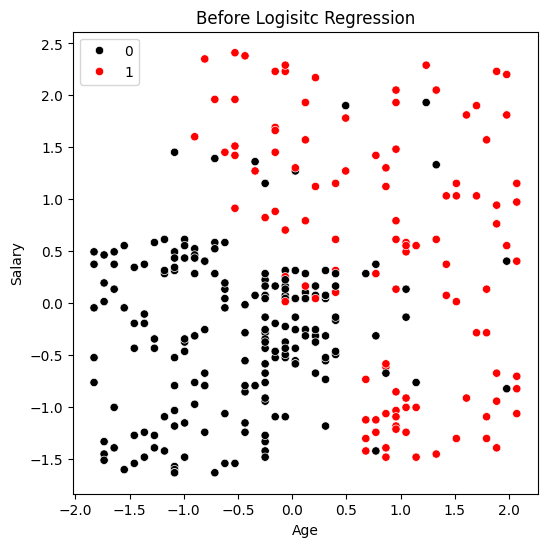

In [51]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train,palette=["black","red"])
plt.title("Before Logisitc Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

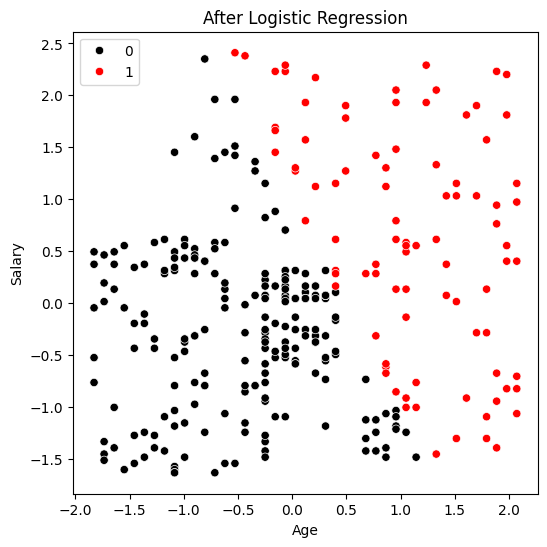

In [52]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train_pred,palette=["black","red"])
plt.title("After Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()